In [822]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import matplotlib.colors as mcolors
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import json

# Whole Dataset

In [965]:
reviews = pd.read_excel('product reviews.xlsx')
reviews#.head()

,product,title,content,score
0,Eyeshadow Stick,WILL CONTINUE TO BUY!,Love product. Love the color and how easily it...,5
1,Eyeshadow Stick,Not a concealer!,"I thought this would be a concealer, but it&#x...",3
2,Eyeshadow Stick,disappointed,Honestly thought I was buying a concealer. I t...,1
3,Eyeshadow Stick,Very Nice But Needs a Slight Improvement Desig...,"I&#x27;ve been using this for about a week, an...",4
4,Eyeshadow Stick,I wanted this to be the magic treatment...,I wanted this to be the magic treatment that w...,4
...,...,...,...,...
6519,Mascara,Honest review: Makeup artist NOT approved,I am a professional makeup artist and have wor...,1
6520,Mascara,This caused me to lose eyelashes after ONE use.,"I have been wanting a healthier mascara, as I ...",1
6521,Mascara,"Me encanto, hace lo que","Me encanto, hace lo que te ofrece",5
6522,Mascara,I bought this a few,I bought this a few months ago and it‚Äôs the ...,5


In [966]:
reviews.shape

(6524, 4)

In [967]:
reviews.dtypes

product    object
title      object
content    object
score       int64
dtype: object

In [968]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6524 entries, 0 to 6523
Data columns (total 4 columns):
product    6524 non-null object
title      6524 non-null object
content    6524 non-null object
score      6524 non-null int64
dtypes: int64(1), object(3)
memory usage: 127.5+ KB


In [969]:
# Removing the Duplicates if any
review_dup = reviews.duplicated()
Num_dup= reviews.duplicated().sum()
reviews.drop_duplicates(inplace=True)
print('Number of Duplicates:',Num_dup )

Number of Duplicates: 1106


In [970]:
# Check for the null values in each column
reviews.isnull().sum()

product    0
title      0
content    0
score      0
dtype: int64

* No missing value

In [972]:
# Summary statistics of 'rating' variable
reviews[['score']].describe().round(1)

,score
count,5418.0
mean,3.8
std,1.6
min,1.0
25%,2.0
50%,5.0
75%,5.0
max,5.0


In [151]:
# find minimum and maximum ratings 

def find_min_max_rating():
    print('The minimum rating is: %d' %(reviews['score'].min()))
    print('The maximum rating is: %d' %(reviews['score'].max()))
    
find_min_max_rating() 

The minimum rating is: 1
The maximum rating is: 5


In [830]:
# Number of reviews for each score
rating_nums = reviews.groupby('score').size()
rating_nums

score
1     962
2     441
3     403
4     352
5    3260
dtype: int64


In [153]:
# Number of unique product in the data
print('Number of unique PRODUCTS in the data = ', reviews['product'].nunique())

Number of unique PRODUCTS in the data =  2


In [90]:
# Number of reviews for each product
num_reviews = reviews.groupby('product', as_index=False).agg({'score':'size'})
num_reviews.rename(columns={'score': 'num_reviews'}, inplace=True)
num_reviews


,product,num_reviews
0,Eyeshadow Stick,746
1,Mascara,4672


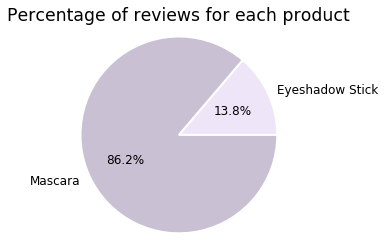

In [846]:
# Pie Chart
y = num_reviews['num_reviews']
labels = num_reviews['product']
colors=['#eee5f8', '#c9c0d3']
plt.pie(y, labels = labels,colors=colors,autopct='%1.1f%%', wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
plt.title('Percentage of reviews for each product')
plt.axis('equal')
plt.show() 

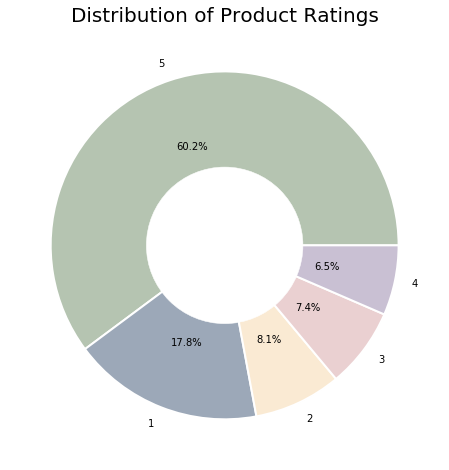

In [833]:
ratings = reviews['score'].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = [ "#b5c4b1", "#9ca8b8", '#faead3', "#ead0d1", "#c9c0d3"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors = custom_colors, autopct='%1.1f%%', wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
central_circle = plt.Circle((0, 0), 0.45, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Product Ratings", fontsize=20)
plt.show()

* Text Preprocessing

In [1029]:
reviews_content = pd.DataFrame(reviews, columns=['score', 'content'])
reviews_content.rename(columns = {'score':'Rating','content':'Review'},inplace = True)
reviews_content


,Rating,Review
0,5,Love product. Love the color and how easily it...
1,3,"I thought this would be a concealer, but it&#x..."
2,1,Honestly thought I was buying a concealer. I t...
3,4,"I&#x27;ve been using this for about a week, an..."
4,4,I wanted this to be the magic treatment that w...
...,...,...
6519,1,I am a professional makeup artist and have wor...
6520,1,"I have been wanting a healthier mascara, as I ..."
6521,5,"Me encanto, hace lo que te ofrece"
6522,5,I bought this a few months ago and it‚Äôs the ...


In [1030]:
reviews_title = pd.DataFrame(reviews, columns=['score', 'title'])
reviews_title.rename(columns = {'score':'Rating','title':'Summary'},inplace = True)
reviews_title

,Rating,Summary
0,5,WILL CONTINUE TO BUY!
1,3,Not a concealer!
2,1,disappointed
3,4,Very Nice But Needs a Slight Improvement Desig...
4,4,I wanted this to be the magic treatment...
...,...,...
6519,1,Honest review: Makeup artist NOT approved
6520,1,This caused me to lose eyelashes after ONE use.
6521,5,"Me encanto, hace lo que"
6522,5,I bought this a few


In [1031]:
def apply_sentiment(Rating):
    if(Rating <= 3 ):
        return 'negative'
    
    else:
        return 'positive'

In [1032]:
reviews_content['Sentiment'] = reviews_content['Rating'].apply(apply_sentiment)
reviews_title['Sentiment'] = reviews_title['Rating'].apply(apply_sentiment)

In [1033]:
sentiment_content = reviews_content['Sentiment'].value_counts()
sentiment_content

positive    3612
negative    1806
Name: Sentiment, dtype: int64

In [611]:
sentiment_title = reviews_title['Sentiment'].value_counts()
sentiment_title

positive    3612
negative    1806
Name: Sentiment, dtype: int64

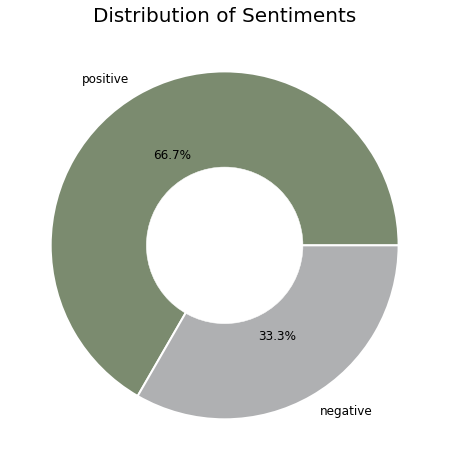

In [834]:
ratings = reviews_title['Sentiment'].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["#7b8b6f", "#afb0b2"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors = custom_colors, autopct='%1.1f%%', wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
central_circle = plt.Circle((0, 0), 0.45, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Sentiments", fontsize=20)
plt.show()

In [1034]:
def clean_text(Review):
   
    Review = str(Review).lower() # convert to lowercase 
    Review = re.sub('\[.*?\]', '', Review) 
    Review = re.sub('https?://\S+|www\.\S+', '', Review) # Remove URls
    Review = re.sub('<.*?>+', '', Review)
    Review = re.sub(r'[^a-z0-9\s]', '', Review) # Remove punctuation
    Review = re.sub('\n', '', Review)
    Review = re.sub('\w*\d\w*', '', Review)
    return Review

In [615]:
def clean_text(Summary):
   
    Summary = str(Summary).lower() # convert to lowercase 
    Summary = re.sub('\[.*?\]', '', Summary) 
    Summary = re.sub('https?://\S+|www\.\S+', '', Summary) # Remove URls
    Summary = re.sub('<.*?>+', '', Summary)
    Summary = re.sub(r'[^a-z0-9\s]', '', Summary) # Remove punctuation
    Summary = re.sub('\n', '', Summary)
    Summary = re.sub('\w*\d\w*', '', Summary)
    return Summary

In [1035]:
reviews_content['Review'] = reviews_content['Review'].apply(clean_text)
reviews_content.head()

,Rating,Review,Sentiment
0,5,love product love the color and how easily it ...,positive
1,3,i thought this would be a concealer but much ...,negative
2,1,honestly thought i was buying a concealer i th...,negative
3,4,been using this for about a week and honestly...,positive
4,4,i wanted this to be the magic treatment that w...,positive


In [1036]:
reviews_title['Summary'] = reviews_title['Summary'].apply(clean_text)
reviews_title.head()

,Rating,Summary,Sentiment
0,5,will continue to buy,positive
1,3,not a concealer,negative
2,1,disappointed,negative
3,4,very nice but needs a slight improvement desig...,positive
4,4,i wanted this to be the magic treatment,positive


In [1039]:
## Removal of Stopwords
from nltk.corpus import stopwords
STOPWORDS_spanish = stopwords.words('spanish')
STOPWORDS_english = stopwords.words('english')
ALL_STOPWORDS = STOPWORDS_spanish + STOPWORDS_english
def remove_stopwords(text):
    
    return " ".join([word for word in str(text).split() if word not in ALL_STOPWORDS])

reviews_title['summary_text'] = reviews_title['Summary'].apply(lambda text: remove_stopwords(text))
reviews_content['review_text'] = reviews_content['Review'].apply(lambda text: remove_stopwords(text))

In [1040]:
reviews_title.head()

,Rating,Summary,Sentiment,summary_text
0,5,will continue to buy,positive,continue buy
1,3,not a concealer,negative,concealer
2,1,disappointed,negative,disappointed
3,4,very nice but needs a slight improvement desig...,positive,nice needs slight improvement designwise
4,4,i wanted this to be the magic treatment,positive,wanted magic treatment


In [1041]:
reviews_content.head()

,Rating,Review,Sentiment,review_text
0,5,love product love the color and how easily it ...,positive,love product love color easily glides buy love...
1,3,i thought this would be a concealer but much ...,negative,thought would concealer much lighter surprised...
2,1,honestly thought i was buying a concealer i th...,negative,honestly thought buying concealer thought read...
3,4,been using this for about a week and honestly...,positive,using week honestly night writing ready commit...
4,4,i wanted this to be the magic treatment that w...,positive,wanted magic treatment would make eyes appear ...


* Word Cloud

In [158]:
from wordcloud import WordCloud

In [586]:
# Check for NULL values
reviews_content.isna().sum()

Rating         0
Review         0
Sentiment      0
review_text    0
dtype: int64

In [587]:
# Check for NULL values
reviews_title.isna().sum()

Rating          0
Summary         0
Sentiment       0
summary_text    0
dtype: int64

In [588]:
text = " ".join(review for review in reviews_content.review_text)
print ("There are {} words in the combination of all review.".format(len(text)))

text_5 = " ".join(review for review in reviews_content.review_text.loc[reviews_content.Rating == 5])
print ("There are {} words in the combination of rating 5 review.".format(len(text_5)))

text_1 = " ".join(review for review in reviews_content.review_text.loc[reviews_content.Rating == 1])
print ("There are {} words in the combination of rating 1 review.".format(len(text_1)))

There are 729455 words in the combination of all review.
There are 397985 words in the combination of rating 5 review.
There are 149510 words in the combination of rating 1 review.


In [606]:
summary = " ".join(review for review in reviews_title.summary_text)
print ("There are {} words in the combination of all review.".format(len(summary)))

summary_5 = " ".join(review for review in reviews_title.summary_text.loc[reviews_title.Rating == 5])
print ("There are {} words in the combination of rating 5 review.".format(len(summary_5)))

summary_1 = " ".join(review for review in reviews_title.summary_text.loc[reviews_title.Rating == 1])
print ("There are {} words in the combination of rating 1 review.".format(len(summary_1)))

summary_positive = " ".join(review for review in reviews_title.summary_text.loc[reviews_title.Sentiment == 'positive'])
print ("There are {} words in the combination of positive review.".format(len(summary_positive)))

summary_negative = " ".join(review for review in reviews_title.summary_text.loc[reviews_title.Sentiment == 'negative'])
print ("There are {} words in the combination of negative review.".format(len(summary_negative)))

There are 77733 words in the combination of all review.
There are 46829 words in the combination of rating 5 review.
There are 13658 words in the combination of rating 1 review.
There are 52363 words in the combination of positive review.
There are 19747 words in the combination of negative review.


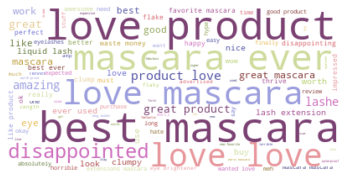

In [853]:
# Generate a word cloud image -- Title Summary
wordcloud = WordCloud(stopwords = all_stop_words, max_font_size=50, max_words=100, background_color="white", colormap = "tab20b").generate(summary)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [854]:
# Save the image in the folder:
wordcloud.to_file("C:/Users/Kangaroo Sissi/Documents/BAN/JOBS/RealEyes Digital/Product Review/WordCloud of All Titles.png")

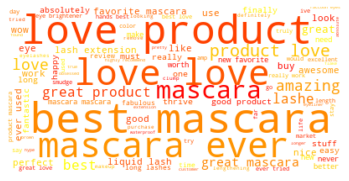

In [858]:
# Generate a word cloud image for Positive Review -- Title Summary
wordcloud = WordCloud(stopwords = all_stop_words, max_font_size=50, max_words=100, background_color="white", colormap = "autumn").generate(summary_positive)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [859]:
# Save the image in the folder:
wordcloud.to_file("C:/Users/Kangaroo Sissi/Documents/BAN/JOBS/RealEyes Digital/Product Review/WordCloud of All Positive Titles.png")

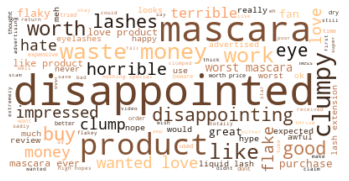

In [863]:
# Generate a word cloud image for Negative Review -- Title Summary
wordcloud = WordCloud(stopwords = all_stop_words, max_font_size=50, max_words=100, background_color="white", colormap = "copper").generate(summary_negative)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [864]:
# Save the image in the folder:
wordcloud.to_file("C:/Users/Kangaroo Sissi/Documents/BAN/JOBS/RealEyes Digital/Product Review/WordCloud of All Negative Titles.png")

# Split Dataset based on products: Eyeshadow Stick and Mascara

* Eyeshadow Stick

In [15]:
eyeshadow = reviews[reviews['product'] == 'Eyeshadow Stick']
eyeshadow

,product,title,content,score
0,Eyeshadow Stick,WILL CONTINUE TO BUY!,Love product. Love the color and how easily it...,5
1,Eyeshadow Stick,Not a concealer!,"I thought this would be a concealer, but it&#x...",3
2,Eyeshadow Stick,disappointed,Honestly thought I was buying a concealer. I t...,1
3,Eyeshadow Stick,Very Nice But Needs a Slight Improvement Desig...,"I&#x27;ve been using this for about a week, an...",4
4,Eyeshadow Stick,I wanted this to be the magic treatment...,I wanted this to be the magic treatment that w...,4
...,...,...,...,...
934,Eyeshadow Stick,Color a bit off: Emma,I was really excited to try out this product. ...,2
935,Eyeshadow Stick,I have searched for over 35 years for this result,My brother and now of course my son and grands...,5
936,Eyeshadow Stick,"Basic, could have bought it at Walgreens.",Kind of a shimmery shadowy glimmer stick- very...,1
937,Eyeshadow Stick,an little disappointing in coverage,an little disappointing in coverage,3


In [25]:
eyeshadow.shape

(939, 4)

In [26]:
eyeshadow.dtypes

product    object
title      object
content    object
score       int64
dtype: object

In [27]:
eyeshadow.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 939 entries, 0 to 938
Data columns (total 4 columns):
product    939 non-null object
title      939 non-null object
content    939 non-null object
score      939 non-null int64
dtypes: int64(1), object(3)
memory usage: 25.7+ KB


In [37]:
# Removing the Duplicates if any
eyeshadow.duplicated().sum()
eyeshadow.drop_duplicates(inplace=True)

In [30]:
# Check for the null values in each column
eyeshadow.isnull().sum()

product    0
title      0
content    0
score      0
dtype: int64

* No missing value

In [56]:
# Summary statistics of 'rating' variable
eyeshadow[['score']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
score,746.0,4.073727,1.437254,1.0,3.0,5.0,5.0,5.0


In [74]:
# find minimum and maximum ratings 

def find_min_max_rating():
    print('The minimum rating is: %d' %(eyeshadow['score'].min()))
    print('The maximum rating is: %d' %(eyeshadow['score'].max()))
    
find_min_max_rating() 

The minimum rating is: 1
The maximum rating is: 5


In [79]:
# Number of Eyeshadow Stick reviews for each score
rating_eyeshadow = eyeshadow.groupby('score').size()
rating_eyeshadow

score
1     89
2     49
3     63
4     62
5    483
dtype: int64

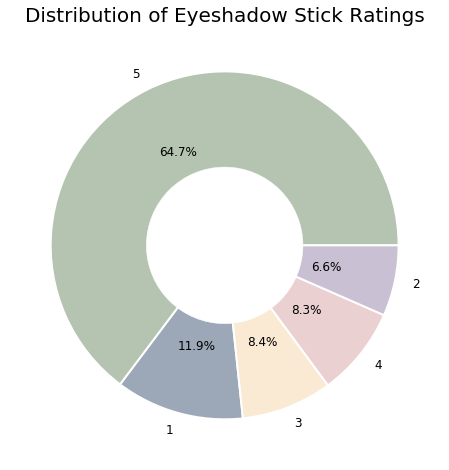

In [835]:
# Score Distribution of Eyeshadow Stick
ratings = eyeshadow['score'].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = [ "#b5c4b1", "#9ca8b8", '#faead3', "#ead0d1", "#c9c0d3"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors = custom_colors, autopct='%1.1f%%', wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
central_circle = plt.Circle((0, 0), 0.45, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Eyeshadow Stick Ratings", fontsize=20)
plt.show()

In [ ]:
# words per review
plt.figure(figsize = (14,6))
WordsPerReview = df['Text'].apply(lambda x: len(x.split(' ')))

sns.histplot(WordsPerReview,bins = 100)

plt.xlabel('Review Length')
plt.show()

* Text Preprocessing

In [974]:
eyeshadow_title = pd.DataFrame(eyeshadow, columns=['score', 'title'])
eyeshadow_title.rename(columns = {'score':'Rating','title':'Summary'},inplace = True)
eyeshadow_title

,Rating,Summary
0,5,WILL CONTINUE TO BUY!
1,3,Not a concealer!
2,1,disappointed
3,4,Very Nice But Needs a Slight Improvement Desig...
4,4,I wanted this to be the magic treatment...
...,...,...
934,2,Color a bit off: Emma
935,5,I have searched for over 35 years for this result
936,1,"Basic, could have bought it at Walgreens."
937,3,an little disappointing in coverage


In [1046]:
eyeshadow_content = pd.DataFrame(eyeshadow, columns=['score', 'content'])
eyeshadow_content.rename(columns = {'score':'Rating','content':'Review'},inplace = True)
eyeshadow_content

,Rating,Review
0,5,Love product. Love the color and how easily it...
1,3,"I thought this would be a concealer, but it&#x..."
2,1,Honestly thought I was buying a concealer. I t...
3,4,"I&#x27;ve been using this for about a week, an..."
4,4,I wanted this to be the magic treatment that w...
...,...,...
934,2,I was really excited to try out this product. ...
935,5,My brother and now of course my son and grands...
936,1,Kind of a shimmery shadowy glimmer stick- very...
937,3,an little disappointing in coverage


In [975]:
eyeshadow_title['Sentiment'] = eyeshadow_title['Rating'].apply(apply_sentiment)

In [1051]:
eyeshadow_content['Sentiment'] = eyeshadow_content['Rating'].apply(apply_sentiment)

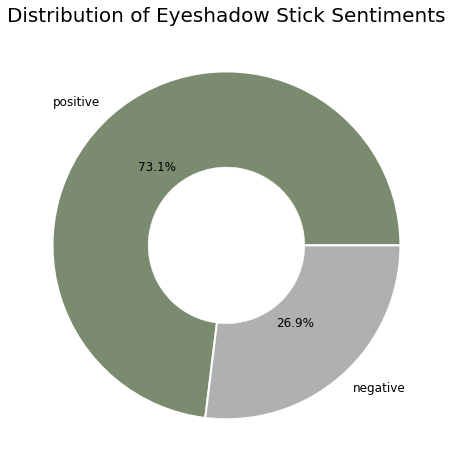

In [976]:
ratings = eyeshadow_title['Sentiment'].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["#7b8b6f", "#afb0b2"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors = custom_colors, autopct='%1.1f%%', wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
central_circle = plt.Circle((0, 0), 0.45, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Eyeshadow Stick Sentiments", fontsize=20)
plt.show()

In [977]:
eyeshadow_title['Summary'] = eyeshadow_title['Summary'].apply(clean_text)
eyeshadow_title.head()

,Rating,Summary,Sentiment
0,5,will continue to buy,positive
1,3,not a concealer,negative
2,1,disappointed,negative
3,4,very nice but needs a slight improvement desig...,positive
4,4,i wanted this to be the magic treatment,positive


In [1052]:
eyeshadow_content['Review'] = eyeshadow_content['Review'].apply(clean_text)
eyeshadow_content.head()

,Rating,Review,Review_text,Sentiment
0,5,love product love the color and how easily it ...,love product love color easily glides buy love...,positive
1,3,i thought this would be a concealer but much ...,thought would concealer much lighter surprised...,negative
2,1,honestly thought i was buying a concealer i th...,honestly thought buying concealer thought read...,negative
3,4,been using this for about a week and honestly...,using week honestly night writing ready commit...,positive
4,4,i wanted this to be the magic treatment that w...,wanted magic treatment would make eyes appear ...,positive


In [978]:
eyeshadow_title['Summary_text'] = eyeshadow_title['Summary'].apply(lambda text: remove_stopwords(text))
eyeshadow_title.head()

,Rating,Summary,Sentiment,Summary_text
0,5,will continue to buy,positive,continue buy
1,3,not a concealer,negative,concealer
2,1,disappointed,negative,disappointed
3,4,very nice but needs a slight improvement desig...,positive,nice needs slight improvement designwise
4,4,i wanted this to be the magic treatment,positive,wanted magic treatment


In [1053]:
eyeshadow_content['Review_text'] = eyeshadow_content['Review'].apply(lambda text: remove_stopwords(text))
eyeshadow_content.head()

,Rating,Review,Review_text,Sentiment
0,5,love product love the color and how easily it ...,love product love color easily glides buy love...,positive
1,3,i thought this would be a concealer but much ...,thought would concealer much lighter surprised...,negative
2,1,honestly thought i was buying a concealer i th...,honestly thought buying concealer thought read...,negative
3,4,been using this for about a week and honestly...,using week honestly night writing ready commit...,positive
4,4,i wanted this to be the magic treatment that w...,wanted magic treatment would make eyes appear ...,positive


* Word Cloud

In [483]:
# Check for NULL values
eyeshadow_title.isna().sum()

Rating          0
Summary         0
Sentiment       0
summary_text    0
dtype: int64

In [501]:
eyeshadow_summary = " ".join(review for review in eyeshadow_title.Summary_text)
print ("There are {} words in the combination of all title.".format(len(eyeshadow_summary)))

eyeshadow_positive = " ".join(review for review in eyeshadow_title.Summary_text.loc[eyeshadow_title.Sentiment == 'positive'])
print ("There are {} words in the combination of positive title.".format(len(eyeshadow_positive)))

eyeshadow_negative = " ".join(review for review in eyeshadow_title.Summary_text.loc[eyeshadow_title.Sentiment == 'negative'])
print ("There are {} words in the combination of negative title.".format(len(eyeshadow_negative)))

There are 9968 words in the combination of all title.
There are 7256 words in the combination of positive title.
There are 2711 words in the combination of negative title.


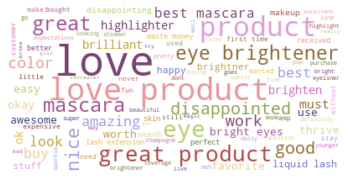

In [890]:
# Generate a word cloud image -- Eyeshadow Stick
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", colormap = 'tab20b').generate(eyeshadow_summary)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [891]:
# Save the image in the folder:
wordcloud.to_file("C:/Users/Kangaroo Sissi/Documents/BAN/JOBS/RealEyes Digital/Product Review/WordCloud of Eyeshadow Stick All Titles.png")

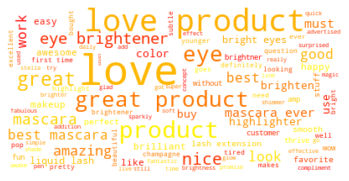

In [902]:
# Generate a word cloud image for Positive Review -- Title Summary -- Eyeshadow Stick
wordcloud = WordCloud(stopwords = all_stop_words, max_font_size=50, max_words=100, background_color="white", colormap = 'autumn').generate(eyeshadow_positive)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [903]:
# Save the image in the folder:
wordcloud.to_file("C:/Users/Kangaroo Sissi/Documents/BAN/JOBS/RealEyes Digital/Product Review/WordCloud of Eyeshadow Stick Positive Titles.png")

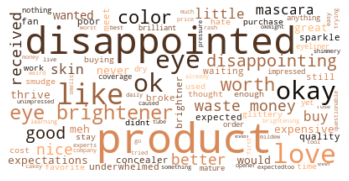

In [914]:
# Generate a word cloud image for Negative Review -- Title Summary -- Eyeshadow Stick
wordcloud = WordCloud(stopwords = all_stop_words, max_font_size=50, max_words=100, background_color="white", colormap = 'copper').generate(eyeshadow_negative)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [915]:
# Save the image in the folder:
wordcloud.to_file("C:/Users/Kangaroo Sissi/Documents/BAN/JOBS/RealEyes Digital/Product Review/WordCloud of Eyeshadow Stick Negative Titles.png")

* Mascara

In [18]:
mascara = reviews[reviews['product'] == 'Mascara']
mascara

,product,title,content,score
939,Mascara,BVA Test Review,This review is a test. Disregard.,5
940,Mascara,My test review!,Just a simple review.,5
941,Mascara,tsst,test,5
942,Mascara,My review,Testing reviews,4
943,Mascara,Liked eyeliner,I have waterproof eyeliner but the mascara is ...,3
...,...,...,...,...
6519,Mascara,Honest review: Makeup artist NOT approved,I am a professional makeup artist and have wor...,1
6520,Mascara,This caused me to lose eyelashes after ONE use.,"I have been wanting a healthier mascara, as I ...",1
6521,Mascara,"Me encanto, hace lo que","Me encanto, hace lo que te ofrece",5
6522,Mascara,I bought this a few,I bought this a few months ago and it‚Äôs the ...,5


In [58]:
mascara.shape

(5585, 4)

In [61]:
mascara.dtypes

product    object
title      object
content    object
score       int64
dtype: object

In [62]:
mascara.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5585 entries, 939 to 6523
Data columns (total 4 columns):
product    5585 non-null object
title      5585 non-null object
content    5585 non-null object
score      5585 non-null int64
dtypes: int64(1), object(3)
memory usage: 152.7+ KB


In [65]:
# Removing the Duplicates if any
mascara.duplicated().sum()
mascara.drop_duplicates(inplace=True)

In [66]:
# Check for the null values in each column
mascara.isnull().sum()

product    0
title      0
content    0
score      0
dtype: int64

* No missing value

In [67]:
# Summary statistics of 'rating' variable
mascara[['score']].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
score,4672.0,3.793236,1.625521,1.0,2.0,5.0,5.0,5.0


In [76]:
# find minimum and maximum ratings 

def find_min_max_rating():
    print('The minimum rating is: %d' %(mascara['score'].min()))
    print('The maximum rating is: %d' %(mascara['score'].max()))
    
find_min_max_rating() 

The minimum rating is: 1
The maximum rating is: 5


In [78]:
# Number of Mascara reviews for each score
rating_mascara = mascara.groupby('score').size()
rating_mascara

score
1     873
2     392
3     340
4     290
5    2777
dtype: int64

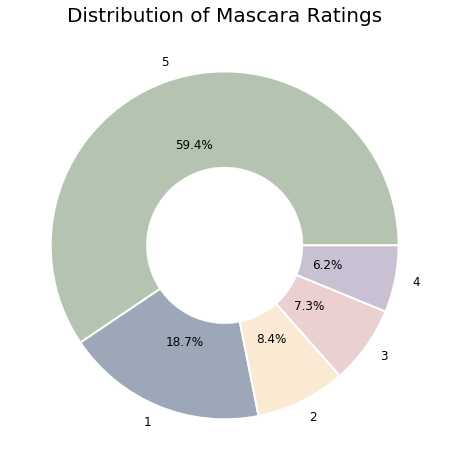

In [837]:
# Score Distribution of Mascara
ratings = mascara['score'].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = [ "#b5c4b1", "#9ca8b8", '#faead3', "#ead0d1", "#c9c0d3"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors = custom_colors, autopct='%1.1f%%', wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
central_circle = plt.Circle((0, 0), 0.45, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Mascara Ratings", fontsize=20)
plt.show()

* Text Preprocessing

In [521]:
mascara_title = pd.DataFrame(mascara, columns=['score', 'title'])
mascara_title.rename(columns = {'score':'Rating','title':'Summary'},inplace = True)
mascara_title

,Rating,Summary
939,5,BVA Test Review
940,5,My test review!
941,5,tsst
942,4,My review
943,3,Liked eyeliner
...,...,...
6519,1,Honest review: Makeup artist NOT approved
6520,1,This caused me to lose eyelashes after ONE use.
6521,5,"Me encanto, hace lo que"
6522,5,I bought this a few


In [523]:
mascara_title['Sentiment'] = mascara_title['Rating'].apply(apply_sentiment)

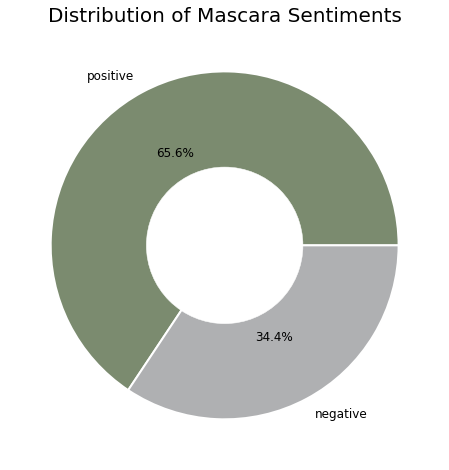

In [838]:
ratings = mascara_title['Sentiment'].value_counts()
numbers = ratings.index
quantity = ratings.values

custom_colors = ["#7b8b6f", "#afb0b2"]
plt.figure(figsize=(10, 8))
plt.pie(quantity, labels=numbers, colors = custom_colors, autopct='%1.1f%%', wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
central_circle = plt.Circle((0, 0), 0.45, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title("Distribution of Mascara Sentiments", fontsize=20)
plt.show()

In [525]:
mascara_title['Summary'] = mascara_title['Summary'].apply(clean_text)
mascara_title.head()

,Rating,Summary,Sentiment
939,5,bva test review,positive
940,5,my test review,positive
941,5,tsst,positive
942,4,my review,positive
943,3,liked eyeliner,negative


In [526]:
mascara_title['Summary_text'] = mascara_title['Summary'].apply(lambda text: remove_stopwords(text))
mascara_title.head()

,Rating,Summary,Sentiment,Summary_text
939,5,bva test review,positive,bva test review
940,5,my test review,positive,test review
941,5,tsst,positive,tsst
942,4,my review,positive,review
943,3,liked eyeliner,negative,liked eyeliner


* Word Cloud

In [527]:
# Check for NULL values
mascara_title.isna().sum()

Rating          0
Summary         0
Sentiment       0
Summary_text    0
dtype: int64

In [536]:
mascara_summary = " ".join(review for review in mascara_title.Summary_text)
print ("There are {} words in the combination of all title.".format(len(mascara_summary)))

mascara_positive = " ".join(review for review in mascara_title.Summary_text.loc[mascara_title.Sentiment == 'positive'])
print ("There are {} words in the combination of positive title.".format(len(mascara_positive)))

mascara_negative = " ".join(review for review in mascara_title.Summary_text.loc[mascara_title.Sentiment == 'negative'])
print ("There are {} words in the combination of negative title.".format(len(mascara_negative)))

There are 67764 words in the combination of all title.
There are 45106 words in the combination of positive title.
There are 22657 words in the combination of negative title.


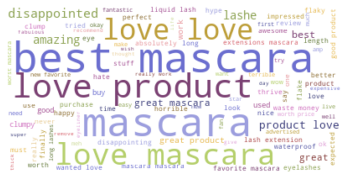

In [934]:
# Generate a word cloud image -- Mascara
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white", colormap = 'tab20b').generate(mascara_summary)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [935]:
# Save the image in the folder:
wordcloud.to_file("C:/Users/Kangaroo Sissi/Documents/BAN/JOBS/RealEyes Digital/Product Review/WordCloud of Masacara All Titles.png")

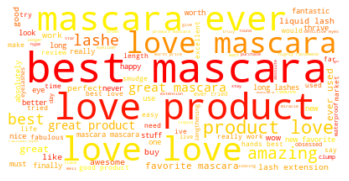

In [936]:
# Generate a word cloud image for Positive Review -- Title Summary -- Mascara
wordcloud = WordCloud(stopwords = all_stop_words, max_font_size=50, max_words=100, background_color="white", colormap = 'autumn').generate(mascara_positive)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [937]:
# Save the image in the folder:
wordcloud.to_file("C:/Users/Kangaroo Sissi/Documents/BAN/JOBS/RealEyes Digital/Product Review/WordCloud of Mascara Positive Titles.png")

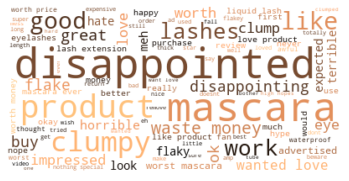

In [948]:
# Generate a word cloud image for Negative Review -- Title Summary -- Mascara
wordcloud = WordCloud(stopwords = all_stop_words, max_font_size=50, max_words=100, background_color="white", colormap = 'copper').generate(mascara_negative)

# Display the generated image:
# the matplotlib way:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [949]:
# Save the image in the folder:
wordcloud.to_file("C:/Users/Kangaroo Sissi/Documents/BAN/JOBS/RealEyes Digital/Product Review/WordCloud of Mascara Negative Titles.png")

# Sentiment Analysis Model Test for Whole Dataset

In [1019]:
from sklearn.model_selection import train_test_split
X = reviews_title['summary_text']
y = reviews_title['Sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = 42,
                                                   test_size = 0.20)
X_train.shape,X_test.shape,y_train.shape

((4334,), (1084,), (4334,))

C:\Users\Kangaroo Sissi\Documents\BAN\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  """


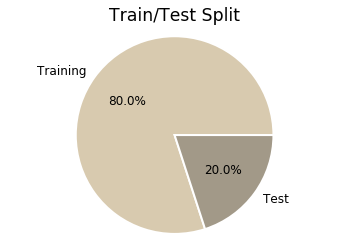

In [1026]:
# Pie Chart
y = [X_train.shape,X_test.shape]
labels = ['Training', 'Test']
colors=['#d8caaf','#a29988']
plt.pie(y, labels = labels,colors=colors,autopct='%1.1f%%', wedgeprops={'linewidth': 2.0, 'edgecolor': 'white'})
plt.title('Train/Test Split')
plt.axis('equal')
plt.show() 

In [1021]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train) 
#X_train_counts.shape
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_train_tfidf.shape

(4334, 1345)

In [979]:
# Eyeshadow Stick
X_e = eyeshadow_title['Summary_text']
y_e = eyeshadow_title['Sentiment']
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X_e, y_e,random_state = 42,
                                                   test_size = 0.20)
X_train_e.shape,X_test_e.shape,y_train_e.shape

((596,), (150,), (596,))

In [980]:
# Mascara
X_m = mascara_title['Summary_text']
y_m = mascara_title['Sentiment']
X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(X_m, y_m,random_state = 42,
                                                   test_size = 0.20)
X_train_m.shape,X_test_m.shape,y_train_m.shape

((3737,), (935,), (3737,))

* Naive Bayes

In [764]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
clf_multiNB_pipe = Pipeline([
    ('vect', CountVectorizer(stop_words= "english")),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB()),
    ])
clf_multiNB_pipe.fit(X_train, y_train)
predictedMultiNB = clf_multiNB_pipe.predict(X_test)
np.mean(predictedMultiNB == y_test)

0.8431734317343174

In [765]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictedMultiNB))

print(confusion_matrix(y_test,predictedMultiNB))

              precision    recall  f1-score   support

    negative       0.84      0.64      0.73       354
    positive       0.84      0.94      0.89       730

    accuracy                           0.84      1084
   macro avg       0.84      0.79      0.81      1084
weighted avg       0.84      0.84      0.84      1084

[[227 127]
 [ 43 687]]


* Logistic Regression Classifier

In [766]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
clf_logReg_pipe = Pipeline([("vect", CountVectorizer()), 
                            ("tfidf", TfidfTransformer()), 
                            ("clf_logReg", LogisticRegression())])
clf_logReg_pipe.fit(X_train, y_train)

import numpy as np
predictedLogReg = clf_logReg_pipe.predict(X_test)
np.mean(predictedLogReg == y_test)

0.8533210332103321

In [767]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictedLogReg))

print(confusion_matrix(y_test,predictedLogReg))

              precision    recall  f1-score   support

    negative       0.80      0.74      0.77       354
    positive       0.88      0.91      0.89       730

    accuracy                           0.85      1084
   macro avg       0.84      0.82      0.83      1084
weighted avg       0.85      0.85      0.85      1084

[[262  92]
 [ 67 663]]


* Support Vector Machine Classifier

In [768]:
from sklearn.svm import LinearSVC
clf_linearSVC_pipe = Pipeline([("vect", CountVectorizer()), 
                               ("tfidf", TfidfTransformer()),
                               ("clf_linearSVC", LinearSVC())])
clf_linearSVC_pipe.fit(X_train, y_train)

predictedLinearSVC = clf_linearSVC_pipe.predict(X_test)
np.mean(predictedLinearSVC == y_test)

0.8413284132841329

In [769]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictedLinearSVC))

print(confusion_matrix(y_test,predictedLinearSVC))

              precision    recall  f1-score   support

    negative       0.76      0.75      0.75       354
    positive       0.88      0.89      0.88       730

    accuracy                           0.84      1084
   macro avg       0.82      0.82      0.82      1084
weighted avg       0.84      0.84      0.84      1084

[[265  89]
 [ 83 647]]


* Decision Tree Classifier

In [628]:
from sklearn.tree import DecisionTreeClassifier
clf_decisionTree_pipe = Pipeline([("vect", CountVectorizer()), 
                                  ("tfidf", TfidfTransformer()), 
                                  ("clf_decisionTree", DecisionTreeClassifier())
                                 ])
clf_decisionTree_pipe.fit(X_train, y_train)

predictedDecisionTree = clf_decisionTree_pipe.predict(X_test)
np.mean(predictedDecisionTree == y_test)

0.8330258302583026

In [770]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictedDecisionTree))

print(confusion_matrix(y_test,predictedDecisionTree))

              precision    recall  f1-score   support

    negative       0.74      0.76      0.75       354
    positive       0.88      0.87      0.88       730

    accuracy                           0.83      1084
   macro avg       0.81      0.81      0.81      1084
weighted avg       0.83      0.83      0.83      1084

[[269  85]
 [ 96 634]]


* Random Forest Classifier

In [629]:
from sklearn.ensemble import RandomForestClassifier
clf_randomForest_pipe = Pipeline([("vect", CountVectorizer()), 
                                  ("tfidf", TfidfTransformer()), 
                                  ("clf_randomForest", RandomForestClassifier())
                                 ])
clf_randomForest_pipe.fit(X_train, y_train)

predictedRandomForest = clf_randomForest_pipe.predict(X_test)
np.mean(predictedRandomForest == y_test)

0.8394833948339483

In [771]:
from sklearn.metrics import classification_report, confusion_matrix
print(classification_report(y_test,predictedRandomForest))

print(confusion_matrix(y_test,predictedRandomForest))

              precision    recall  f1-score   support

    negative       0.76      0.73      0.75       354
    positive       0.87      0.89      0.88       730

    accuracy                           0.84      1084
   macro avg       0.82      0.81      0.82      1084
weighted avg       0.84      0.84      0.84      1084

[[260  94]
 [ 80 650]]


# what the best & words are

* Vectorize

In [798]:
bi_gram = CountVectorizer(ngram_range=(1,2), min_df = 5, binary = True) # 1 means the minimum is unigram, 2 means max is bigrams, 
bi_gram_vectors_train = bi_gram.fit_transform(X_train.values)
bi_gram_vectors_test = bi_gram.transform(X_test.values)

In [799]:
bi_gram_vectors_train.shape

(4334, 323)

In [997]:
bi_gram_e = CountVectorizer(ngram_range=(1,2), min_df = 5, binary = True) # 1 means the minimum is unigram, 2 means max is bigrams, 
bi_gram_vectors_train_e = bi_gram_e.fit_transform(X_train_e.values)
bi_gram_vectors_test_e = bi_gram_e.transform(X_test_e.values)

In [998]:
bi_gram_vectors_train_e.shape

(596, 53)

In [999]:
bi_gram_m = CountVectorizer(ngram_range=(1,2), min_df = 5, binary = True) # 1 means the minimum is unigram, 2 means max is bigrams, 
bi_gram_vectors_train_m = bi_gram_m.fit_transform(X_train_m.values)
bi_gram_vectors_test_m = bi_gram_m.transform(X_test_m.values)

In [1000]:
bi_gram_vectors_train_m.shape

(3737, 285)

* By coefficiency

In [986]:
from sklearn.linear_model import LogisticRegression

logreg_bi_gram = LogisticRegression(C = 1e5, class_weight = 'balanced')
logreg_bi_gram_result = logreg_bi_gram.fit(bi_gram_vectors_train, y_train)
feature = bi_gram.get_feature_names()
feature_coefs = pd.DataFrame(
    data = list(zip(feature, logreg_bi_gram.coef_[0])),
    columns = ['feature', 'coef'])

feature_coefs.sort_values(by='coef', ascending=False)

C:\Users\Kangaroo Sissi\Documents\BAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,feature,coef
256,used,15.277800
79,far,14.223241
142,liquid,14.215808
104,great product,11.860973
189,nothing,11.418047
...,...,...
81,favorite mascara,-11.897565
273,worst,-12.060057
54,eh,-13.002146
147,long,-13.545061


In [994]:
feature_coefs.sort_values(by='coef', ascending=False).head(20)

,feature,coef
256,used,15.277800
79,far,14.223241
142,liquid,14.215808
104,great product,11.860973
189,nothing,11.418047
99,good product,11.102756
169,mascara,11.099677
114,highly,10.572391
221,right,10.021298
94,go,9.737723


In [1001]:
# Eyeshadow Stick

logreg_bi_gram_e = LogisticRegression(C = 1e5, class_weight = 'balanced')
logreg_bi_gram_result_e = logreg_bi_gram_e.fit(bi_gram_vectors_train_e, y_train_e)
feature_e = bi_gram_e.get_feature_names()
feature_coefs_e = pd.DataFrame(
    data = list(zip(feature_e, logreg_bi_gram_e.coef_[0])),
    columns = ['feature', 'coef'])

feature_coefs_e.sort_values(by='coef', ascending=False)

C:\Users\Kangaroo Sissi\Documents\BAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,feature,coef
0,amazing,12.529840
40,must,12.381718
31,look,12.014924
52,works,11.849034
8,brightens,11.499893
36,makeup,11.248564
51,use,11.243323
25,happy,10.998166
7,brightener,9.509672
35,love product,9.448349


In [1005]:
feature_coefs_e.sort_values(by='coef', ascending=False).head(20)

,feature,coef
0,amazing,12.529840
40,must,12.381718
31,look,12.014924
52,works,11.849034
8,brightens,11.499893
36,makeup,11.248564
51,use,11.243323
25,happy,10.998166
7,brightener,9.509672
35,love product,9.448349


In [1002]:
# Mascara

logreg_bi_gram_m = LogisticRegression(C = 1e5, class_weight = 'balanced')
logreg_bi_gram_result_m = logreg_bi_gram_m.fit(bi_gram_vectors_train_m, y_train_m)
feature_m = bi_gram_m.get_feature_names()
feature_coefs_m = pd.DataFrame(
    data = list(zip(feature_m, logreg_bi_gram_m.coef_[0])),
    columns = ['feature', 'coef'])

feature_coefs_m.sort_values(by='coef', ascending=False)

C:\Users\Kangaroo Sissi\Documents\BAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,feature,coef
12,anything,11.644544
61,excellent,11.569214
78,fantastic,11.118292
251,true,10.235745
191,obsessed,9.792981
...,...,...
75,fall,-9.654867
16,awful,-9.691542
117,hold curl,-10.359603
262,wanted love,-11.104567


In [1006]:
feature_coefs_m.sort_values(by='coef', ascending=False).head(20)

,feature,coef
12,anything,11.644544
61,excellent,11.569214
78,fantastic,11.118292
251,true,10.235745
191,obsessed,9.792981
234,stays,9.606829
141,liner,9.550163
185,new,8.932749
82,finally,8.820600
146,lives,8.730578


* By importance

In [995]:
from sklearn.ensemble import RandomForestClassifier
feature = bi_gram.get_feature_names()
rf_bi_gram = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced', n_jobs = -1)
rf_bi_gram_result = rf_bi_gram.fit(bi_gram_vectors_train, y_train)
rf_feature_importance = pd.DataFrame(data = list(zip(feature, rf_bi_gram.feature_importances_)),
    columns = ['feature', 'importance'])
rf_feature_importance.sort_values(by='importance', ascending=False)

,feature,importance
22,good product,0.046933
8,brightens,0.033417
24,great product,0.022725
50,time,0.010995
15,easy,0.008202
49,thrive,0.004704
51,use,0.004129
25,happy,0.003333
18,eye brightener,0.002909
4,better,0.002246


In [996]:
rf_feature_importance.sort_values(by='importance', ascending=False).head(20)

,feature,importance
22,good product,0.046933
8,brightens,0.033417
24,great product,0.022725
50,time,0.010995
15,easy,0.008202
49,thrive,0.004704
51,use,0.004129
25,happy,0.003333
18,eye brightener,0.002909
4,better,0.002246


In [1003]:
# Eyeshadow
feature_e = bi_gram_e.get_feature_names()
rf_bi_gram_e = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced', n_jobs = -1)
rf_bi_gram_result_e = rf_bi_gram_e.fit(bi_gram_vectors_train_e, y_train_e)
rf_feature_importance_e = pd.DataFrame(data = list(zip(feature_e, rf_bi_gram_e.feature_importances_)),
    columns = ['feature', 'importance'])
rf_feature_importance_e.sort_values(by='importance', ascending=False)

,feature,importance
32,love,0.207903
23,great,0.057606
13,disappointed,0.041748
37,mascara,0.041373
35,love product,0.036402
28,like,0.030554
45,product,0.030078
2,best,0.026130
0,amazing,0.024513
19,eyes,0.023767


In [1007]:
rf_feature_importance_e.sort_values(by='importance', ascending=False).head(20)

,feature,importance
32,love,0.207903
23,great,0.057606
13,disappointed,0.041748
37,mascara,0.041373
35,love product,0.036402
28,like,0.030554
45,product,0.030078
2,best,0.026130
0,amazing,0.024513
19,eyes,0.023767


In [1062]:
# Mascra
feature_m = bi_gram_m.get_feature_names()
rf_bi_gram_m = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced', n_jobs = -1)
rf_bi_gram_result_m = rf_bi_gram_m.fit(bi_gram_vectors_train_m, y_train_m)
rf_feature_importance_m = pd.DataFrame(data = list(zip(feature_m, rf_bi_gram_m.feature_importances_)),
    columns = ['feature', 'importance'])
rf_feature_importance_m.sort_values(by='importance', ascending=False)

,feature,importance
154,love,0.125897
20,best,0.051243
169,mascara,0.048572
46,disappointed,0.038720
6,amazing,0.031434
...,...,...
170,mascara best,0.000079
172,mascara ive,0.000063
126,ive ever,0.000050
37,clumpy flaky,0.000037


In [1063]:
rf_feature_importance_m.sort_values(by='importance', ascending=False).head(20)

,feature,importance
154,love,0.125897
20,best,0.051243
169,mascara,0.048572
46,disappointed,0.038720
6,amazing,0.031434
22,best mascara,0.031169
102,great,0.018968
158,love mascara,0.018318
159,love product,0.018053
56,ever,0.014602


In [1018]:
# Eyeshadow Negative
eyeshadow_n = eyeshadow_title[eyeshadow_title['Sentiment'] == 'negative']
eyeshadow_n

,Rating,Summary,Sentiment,Summary_text
1,3,not a concealer,negative,concealer
2,1,disappointed,negative,disappointed
7,1,broke too easy with little pressure,negative,broke easy little pressure
8,3,this is a nice product,negative,nice product
10,1,i wanted to love this product,negative,wanted love product
...,...,...,...,...
927,2,low pigment high glitter,negative,low pigment high glitter
928,2,sparkle face,negative,sparkle face
934,2,color a bit off emma,negative,color bit emma
936,1,basic could have bought it at walgreens,negative,basic could bought walgreens


In [1016]:
# Mascara Negative
mascara_n = mascara_title[mascara_title['Sentiment'] == 'negative']
mascara_n

,Rating,Summary,Sentiment,Summary_text
943,3,liked eyeliner,negative,liked eyeliner
944,1,lashes for dayzzzzzzz,negative,lashes dayzzzzzzz
947,2,ok,negative,ok
950,2,i love and hate this product,negative,love hate product
952,2,not a fan,negative,fan
...,...,...,...,...
6512,2,not for me,negative,
6513,2,not for me,negative,
6515,2,not a fan,negative,fan
6519,1,honest review makeup artist not approved,negative,honest review makeup artist approved


In [1011]:
X_en = eyeshadow_n['Summary_text']
y_en = eyeshadow_n['Rating']
X_train_en, X_test_en, y_train_en, y_test_en = train_test_split(X_en, y_en,random_state = 42,
                                                   test_size = 0.20)
X_train_en.shape,X_test_en.shape,y_train_en.shape

((160,), (41,), (160,))

In [1012]:
bi_gram_en = CountVectorizer(ngram_range=(1,2), min_df = 5, binary = True) # 1 means the minimum is unigram, 2 means max is bigrams, 
bi_gram_vectors_train_en = bi_gram_en.fit_transform(X_train_en.values)
bi_gram_vectors_test_en = bi_gram_en.transform(X_test_en.values)

In [1013]:
bi_gram_vectors_train_en.shape

(160, 11)

In [1014]:
logreg_bi_gram_en = LogisticRegression(C = 1e5, class_weight = 'balanced')
logreg_bi_gram_result_en = logreg_bi_gram_en.fit(bi_gram_vectors_train_e, y_train_e)
feature_en = bi_gram_en.get_feature_names()
feature_coefs_en = pd.DataFrame(
    data = list(zip(feature_en, logreg_bi_gram_en.coef_[0])),
    columns = ['feature', 'coef'])

feature_coefs_en.sort_values(by='coef', ascending=False)

C:\Users\Kangaroo Sissi\Documents\BAN\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


,feature,coef
0,better,12.529840
8,ok,11.499893
7,love,9.509672
5,eye brightener,8.754600
3,disappointing,4.335946
6,like,3.913197
2,disappointed,2.217530
10,product,0.889172
1,brightener,0.695076
9,okay,-0.863421


In [1015]:
feature_en = bi_gram_en.get_feature_names()
rf_bi_gram_en = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced', n_jobs = -1)
rf_bi_gram_result_en = rf_bi_gram_en.fit(bi_gram_vectors_train_en, y_train_en)
rf_feature_importance_en = pd.DataFrame(data = list(zip(feature_en, rf_bi_gram_en.feature_importances_)),
    columns = ['feature', 'importance'])
rf_feature_importance_en.sort_values(by='importance', ascending=False)

,feature,importance
9,okay,0.154962
6,like,0.139243
7,love,0.133121
8,ok,0.126078
10,product,0.108853
0,better,0.083199
3,disappointing,0.066316
2,disappointed,0.059914
4,eye,0.052394
5,eye brightener,0.043735


In [1054]:
# By content
eyeshadow_cn = eyeshadow_content[eyeshadow_content['Sentiment'] == 'negative']
eyeshadow_cn

,Rating,Review,Review_text,Sentiment
1,3,i thought this would be a concealer but much ...,thought would concealer much lighter surprised...,negative
2,1,honestly thought i was buying a concealer i th...,honestly thought buying concealer thought read...,negative
7,1,i loved the way this looked on however it brok...,loved way looked however broke different times...,negative
8,3,its a nice eye brightener but does not shine l...,nice eye brightener shine long even primer,negative
10,1,i was so excited to try this product i got it ...,excited try product got fit fab fun box love v...,negative
...,...,...,...,...
927,2,i enjoy a natural yet bright eye look and was ...,enjoy natural yet bright eye look excited try ...,negative
928,2,this goes on great for the first hour it looks...,goes great first hour looks really good second...,negative
934,2,i was really excited to try out this product i...,really excited try product bought color emma d...,negative
936,1,kind of a shimmery shadowy glimmer stick very ...,kind shimmery shadowy glimmer stick faint work...,negative


In [1055]:
X_enc = eyeshadow_cn['Review_text']
y_enc = eyeshadow_cn['Sentiment']
X_train_enc, X_test_enc, y_train_enc, y_test_enc = train_test_split(X_enc, y_enc,random_state = 42,
                                                   test_size = 0.20)
X_train_enc.shape,X_test_enc.shape,y_train_enc.shape

((160,), (41,), (160,))

In [1056]:
bi_gram_enc = CountVectorizer(ngram_range=(1,2), min_df = 5, binary = True) # 1 means the minimum is unigram, 2 means max is bigrams, 
bi_gram_vectors_train_enc = bi_gram_enc.fit_transform(X_train_enc.values)
bi_gram_vectors_test_enc = bi_gram_enc.transform(X_test_enc.values)

In [1058]:
bi_gram_vectors_train_enc.shape

(160, 116)

In [1060]:
feature_enc = bi_gram_en.get_feature_names()
rf_bi_gram_enc = RandomForestClassifier(n_estimators = 100, class_weight = 'balanced', n_jobs = -1)
rf_bi_gram_result_enc = rf_bi_gram_enc.fit(bi_gram_vectors_train_enc, y_train_enc)
rf_feature_importance_enc = pd.DataFrame(data = list(zip(feature_enc, rf_bi_gram_enc.feature_importances_)),
    columns = ['feature', 'importance'])
rf_feature_importance_enc.sort_values(by='importance', ascending=False)

,feature,importance
0,better,0.0
1,brightener,0.0
2,disappointed,0.0
3,disappointing,0.0
4,eye,0.0
5,eye brightener,0.0
6,like,0.0
7,love,0.0
8,ok,0.0
9,okay,0.0


In [618]:
with pd.ExcelWriter('product_reviews.xlsx') as writer:  
    reviews_title.to_excel(writer, sheet_name='All_Reviews')
    eyeshadow_title.to_excel(writer, sheet_name='Eyeshadow_Reviews')
    mascara_title.to_excel(writer, sheet_name='Mascara_Reviews')